In [209]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.gofplots import qqplot
from scipy.stats import skewtest
from scipy.stats import pearsonr
# from sklearn import linear_model

In [210]:
data = pd.read_excel('data_penelitian.xlsx', sheet_name = "Form responses_combined",header = 1 )

In [211]:
data.shape

(310, 33)

In [212]:
data.head()

,Timestamp,Jenis Kelamin,Usia,Lokasi domisili,Provinsi,Pekerjaan,"Total perkiraan pemasukan per bulan (contoh: gaji, uang jajan)","Total perkiraan pengeluaran konsumsi per bulan (contoh: makan, transportasi, cicilan aktif)",Hobi/kegemaran,"Apakah anda pernah mengikuti acara virtual sebelumnya? (contoh: webinar, virtual meeting, konser virtual, wisata virtual)",...,Saya mampu melupakan semua kekhawatiran saya.,Kecepatan pergerakan pemandangan penting bagi saya.,Mudah mengikuti arahan navigasi merupakan faktor penting.,Suara latar penting bagi saya.,Kualitas pemandangan / gambar penting bagi saya.,Deskripsi teks penting bagi saya.,Saran untuk tempat-tempat menarik ... penting bagi saya dalam menggunakan virtual tourism.,Saya ingin mengikuti kegiatan virtual tourism selanjutnya.,Saya berniat mengunjungi … dalam aktivitas virtual tourism.,Saya rela menginvestasikan uang dan waktu … dalam virtual tourism.
0,2021-01-07 12:43:39.891,Wanita,25-34,DKI Jakarta,DKI Jakarta,Dosen,Di atas Rp4.000.000,Rp3.000.001 - Rp4.000.000,Rekreasi/Jalan-jalan,Ya,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
1,2021-01-07 13:01:11.647,Wanita,25-34,DKI Jakarta,DKI Jakarta,Dosen,Di atas Rp4.000.000,Rp3.000.001 - Rp4.000.000,Rekreasi/Jalan-jalan,Ya,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2,2021-01-07 13:02:48.503,Wanita,25-34,DKI Jakarta,DKI Jakarta,Dosen,Di atas Rp4.000.000,Rp3.000.001 - Rp4.000.000,Rekreasi/Jalan-jalan,Ya,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
3,2021-01-07 21:02:46.365,Wanita,18-24,Tangerang,Banten,Mahasiswa,Di bawah Rp1.000.000,Di bawah Rp1.000.000,Main games,Ya,...,3.0,5.0,5.0,5.0,5.0,4.0,4.0,5.0,5.0,5.0
4,2021-01-07 21:07:18.334,Wanita,18-24,Tangerang,Banten,Mahasiswa,Di bawah Rp1.000.000,Di bawah Rp1.000.000,Main games,Ya,...,3.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,5.0,5.0


In [213]:
data.columns.tolist()

['Timestamp',
 'Jenis Kelamin',
 'Usia',
 'Lokasi domisili',
 'Provinsi',
 'Pekerjaan',
 'Total perkiraan pemasukan per bulan (contoh: gaji, uang jajan)',
 'Total perkiraan pengeluaran konsumsi per bulan (contoh: makan, transportasi, cicilan aktif)',
 'Hobi/kegemaran',
 'Apakah anda pernah mengikuti acara virtual sebelumnya? (contoh: webinar, virtual meeting, konser virtual, wisata virtual)',
 'Silakan pilih Video Virtual Tourism yang Anda ingin saksikan, terima kasih.',
 'Perasaan yang saya dapatkan ketika menonton video virtual tourism',
 'Saya menikmati keseluruhan pengalaman yang disajikan dalam Virtual Tourism',
 'Saya merasa terhibur dengan mengikuti kegiatan dalam Virtual Tourism',
 'Games interaktif pada Virtual Tourism menyenangkan untuk saya.',
 'Mengikuti virtual tourism membangkitkan rasa ingin tahu saya.',
 'Virtual tourism dapat menjadi sarana yang ….. alami saya.',
 'Virtual tourism memungkinkan ... sejarah dengan baik.',
 'Sistem VR dalam Virtual …. tujuan wisata dengan

In [214]:
sns.set_style('whitegrid')

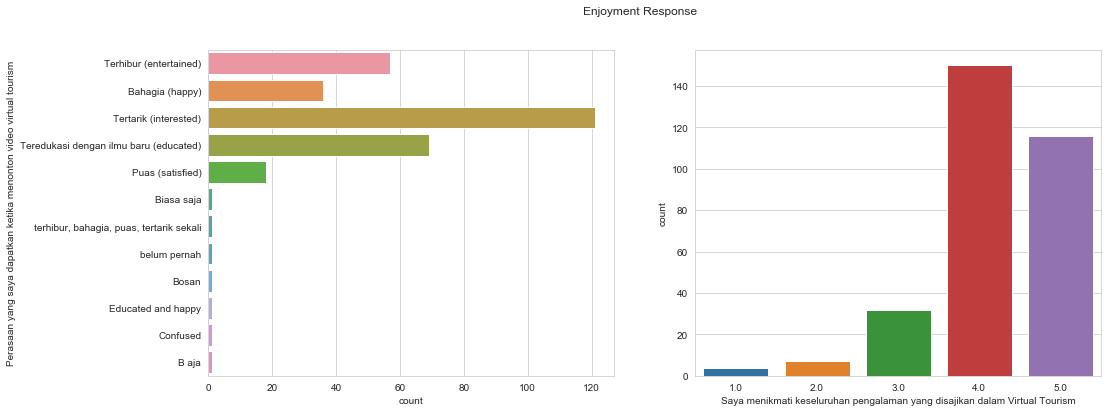

In [215]:
fig,ax1 = plt.subplots(1,2, figsize = (16,6))
fig.suptitle('Enjoyment Response')
sns.countplot(y='Perasaan yang saya dapatkan ketika menonton video virtual tourism', data=data, ax = ax1[0])
sns.countplot(x='Saya menikmati keseluruhan pengalaman yang disajikan dalam Virtual Tourism', data=data, ax = ax1[1])

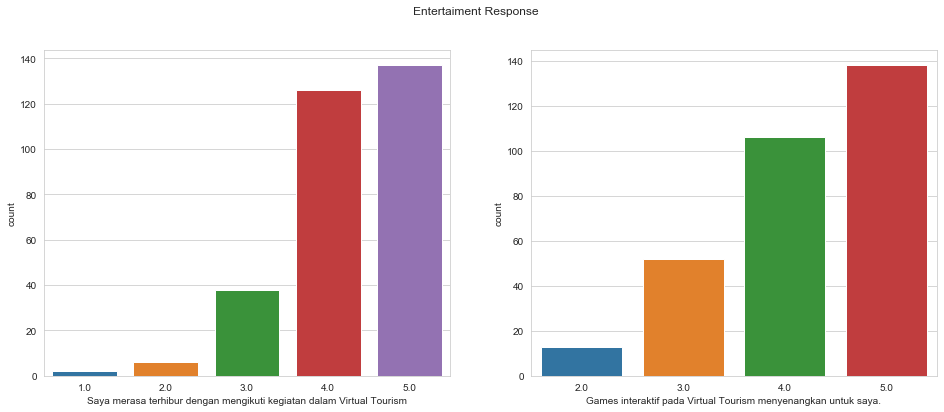

In [216]:
fig,ax1 = plt.subplots(1,2, figsize = (16,6))
fig.suptitle('Entertaiment Response')
sns.countplot(x='Saya merasa terhibur dengan mengikuti kegiatan dalam Virtual Tourism', data=data, ax = ax1[0])
sns.countplot(x='Games interaktif pada Virtual Tourism menyenangkan untuk saya.', data=data, ax = ax1[1])

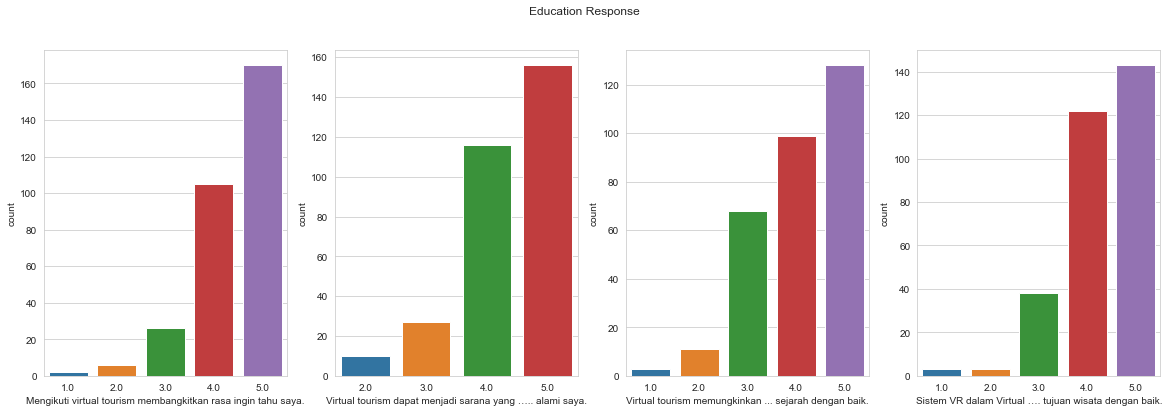

In [217]:
fig,ax1 = plt.subplots(1,4, figsize = (20,6))
fig.suptitle('Education Response')
sns.countplot(x='Mengikuti virtual tourism membangkitkan rasa ingin tahu saya.', data=data, ax = ax1[0])
sns.countplot(x='Virtual tourism dapat menjadi sarana yang ….. alami saya.', data=data, ax = ax1[1])
sns.countplot(x='Virtual tourism memungkinkan ... sejarah dengan baik.', data=data, ax = ax1[2])
sns.countplot(x='Sistem VR dalam Virtual …. tujuan wisata dengan baik.', data=data, ax = ax1[3])

(0.0, 1.0, 0.0, 1.0)

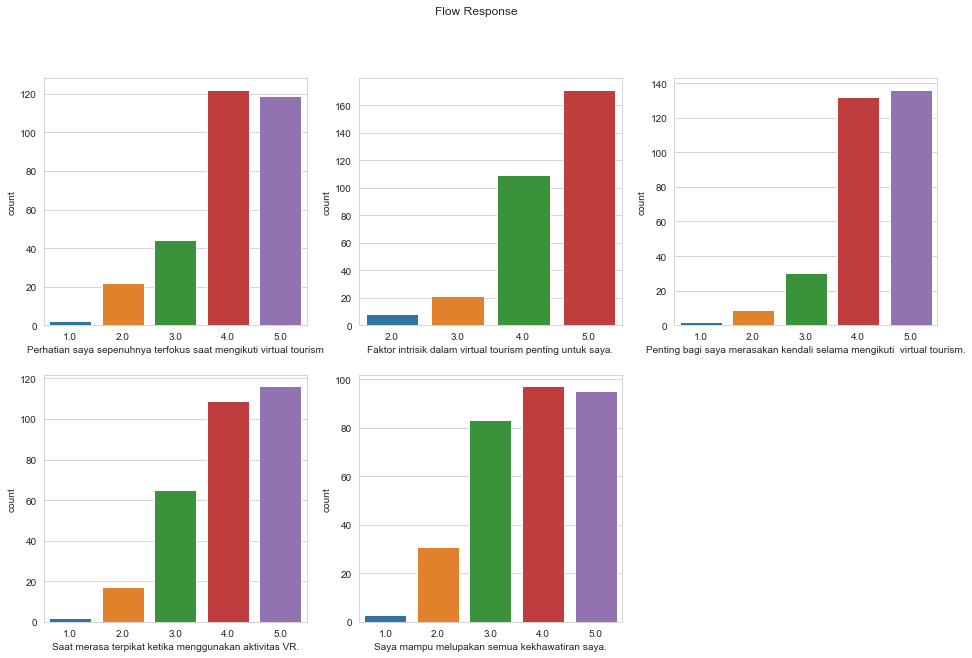

In [218]:
fig,ax1 = plt.subplots(2,3, figsize = (16,10))
fig.suptitle('Flow Response')
sns.countplot(x='Perhatian saya sepenuhnya terfokus saat mengikuti virtual tourism', data=data, ax = ax1[0,0])
sns.countplot(x='Faktor intrisik dalam virtual tourism penting untuk saya.', data=data, ax = ax1[0,1])
sns.countplot(x='Penting bagi saya merasakan kendali selama mengikuti  virtual tourism.', data=data, ax = ax1[0,2])
sns.countplot(x='Saat merasa terpikat ketika menggunakan aktivitas VR.', data=data, ax = ax1[1,0])
sns.countplot(x='Saya mampu melupakan semua kekhawatiran saya.', data=data, ax = ax1[1,1])
ax1[-1, -1].axis('off')

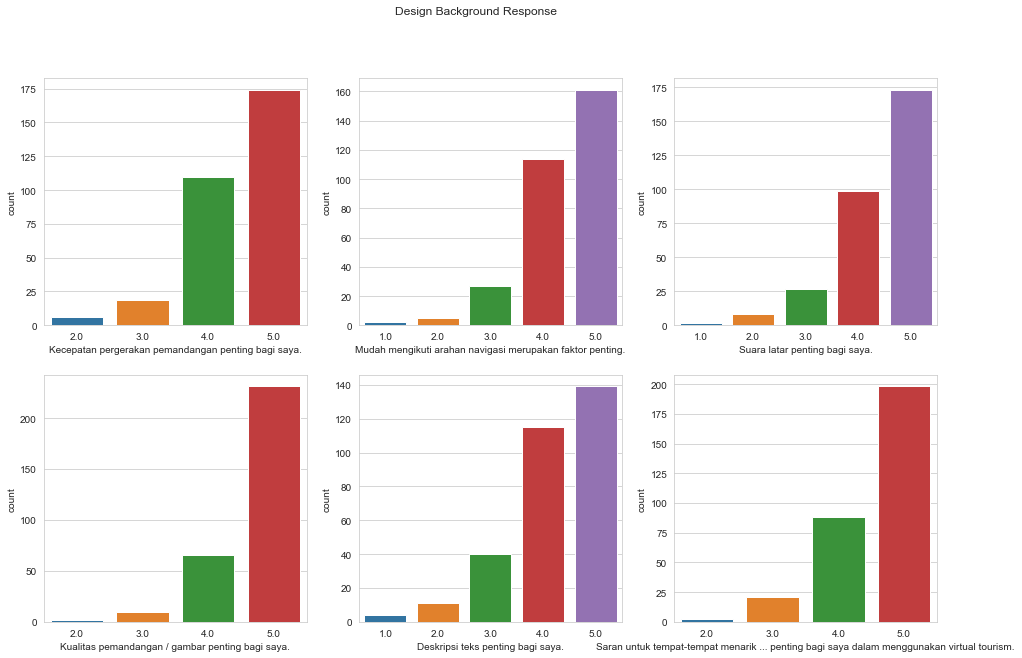

In [219]:
fig,ax1 = plt.subplots(2,3, figsize = (16,10))
fig.suptitle('Design Background Response')
sns.countplot(x='Kecepatan pergerakan pemandangan penting bagi saya.', data=data, ax = ax1[0,0])
sns.countplot(x='Mudah mengikuti arahan navigasi merupakan faktor penting.', data=data, ax = ax1[0,1])
sns.countplot(x='Suara latar penting bagi saya.', data=data, ax = ax1[0,2])
sns.countplot(x='Kualitas pemandangan / gambar penting bagi saya.', data=data, ax = ax1[1,0])
sns.countplot(x='Deskripsi teks penting bagi saya.', data=data, ax = ax1[1,1])
sns.countplot(x='Saran untuk tempat-tempat menarik ... penting bagi saya dalam menggunakan virtual tourism.',data=data,ax=ax1[1,2])

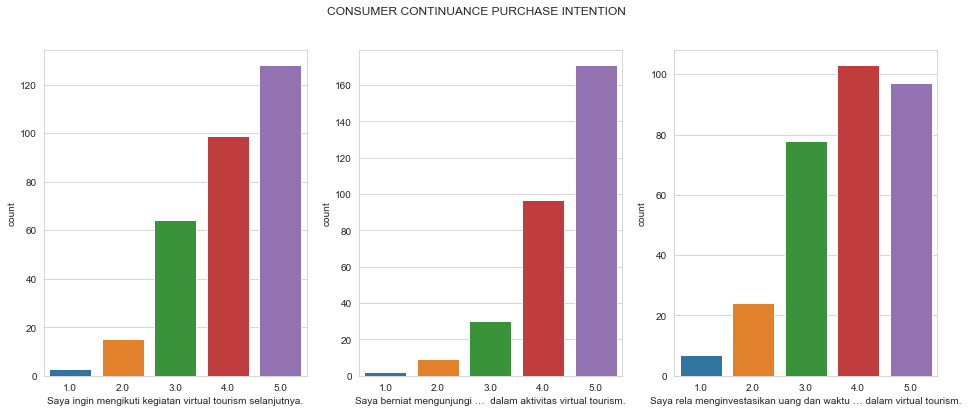

In [220]:
fig,ax1 = plt.subplots(1,3, figsize = (16,6))
fig.suptitle('CONSUMER CONTINUANCE PURCHASE INTENTION')
sns.countplot(x='Saya ingin mengikuti kegiatan virtual tourism selanjutnya.', data=data, ax = ax1[0])
sns.countplot(x='Saya berniat mengunjungi …  dalam aktivitas virtual tourism.', data=data, ax = ax1[1])
sns.countplot(x='Saya rela menginvestasikan uang dan waktu … dalam virtual tourism.', data=data, ax = ax1[2])

In [221]:
def get_mean_df(df):
    col = df.loc[: , df.columns.tolist()]
    df['df_mean'] = col.mean(axis=1)
    df = df[['df_mean']]
    return df

In [222]:
dataset = data.iloc[:,12:]
dataset = dataset.dropna()

atensi = dataset.iloc[:,-3:]
atensi = get_mean_df(atensi)

enjoyment = dataset.iloc[:,0:1]
enjoyment = get_mean_df(enjoyment)

entertaiment = dataset.iloc[:,1:3]
entertaiment = get_mean_df(entertaiment)

education = dataset.iloc[:,3:7]
education = get_mean_df(education)

flow = dataset.iloc[:,7:12]
flow = get_mean_df(flow)

design_background = dataset.iloc[:,12:18]
design_background = get_mean_df(design_background)

dataset = pd.DataFrame({"continuance_purchase_intention":atensi.df_mean,
                       "enjoyment":enjoyment.df_mean,
                       "entertaiment":entertaiment.df_mean,
                       "education":education.df_mean,
                       "flow":flow.df_mean,
                       "design_background":design_background.df_mean,})

c:\users\microsoft user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [223]:
dataset

,continuance_purchase_intention,enjoyment,entertaiment,education,flow,design_background
0,5.000000,5.0,5.0,5.00,5.0,5.000000
1,5.000000,5.0,5.0,5.00,5.0,5.000000
2,5.000000,5.0,5.0,5.00,5.0,5.000000
3,5.000000,5.0,3.5,5.00,4.0,4.666667
4,5.000000,5.0,5.0,5.00,4.0,4.833333
...,...,...,...,...,...,...
304,5.000000,3.0,5.0,5.00,5.0,5.000000
305,4.333333,4.0,4.5,4.25,3.8,4.166667
306,3.666667,4.0,3.5,3.75,4.0,4.500000
307,3.000000,2.0,2.5,3.75,3.0,4.166667


### 0.Descriptive Statistics

In [224]:
dataset.describe()

,continuance_purchase_intention,enjoyment,entertaiment,education,flow,design_background
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,4.099245,4.187702,4.228155,4.286408,4.124919,4.453074
std,0.779566,0.808063,0.758427,0.689445,0.696788,0.534565
min,1.000000,1.000000,1.500000,1.250000,1.200000,1.500000
25%,3.666667,4.000000,4.000000,4.000000,3.800000,4.000000
50%,4.333333,4.000000,4.500000,4.250000,4.200000,4.666667
75%,4.666667,5.000000,5.000000,5.000000,4.600000,4.833333
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


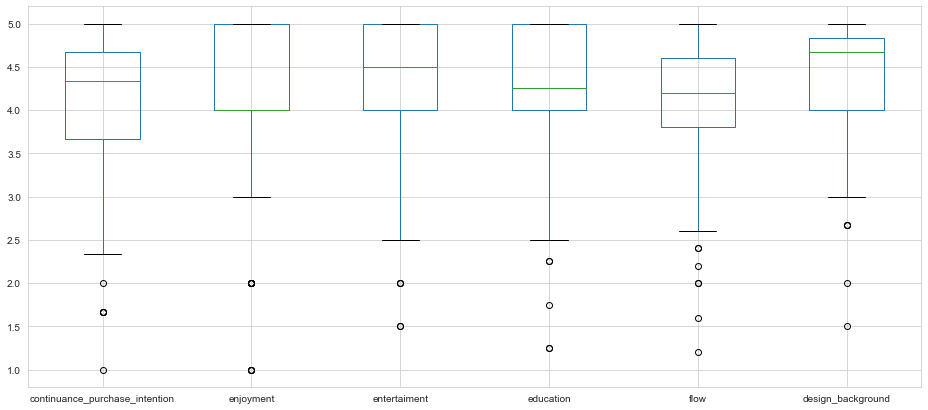

In [225]:
dataset.boxplot(figsize=(16,7))

### 1. Normal Distribution

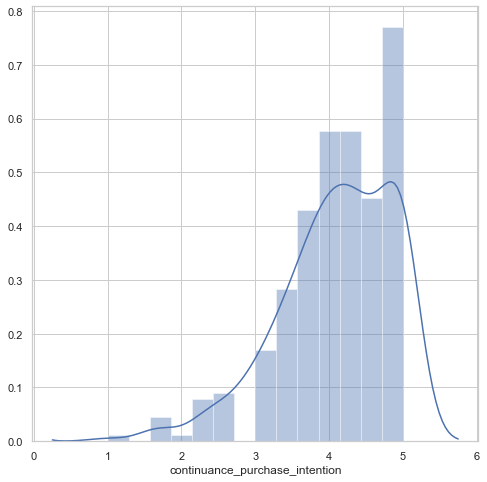

In [236]:
fig,ax = plt.subplots(figsize = (8,8))
# sns.set(color_codes=True)
sns.set_style('whitegrid')
sns.distplot(dataset["continuance_purchase_intention"],ax=ax);

In [237]:
def pp_plot(x, dist, line=True, ax=None):
    '''
    Function for comparing empirical data to a theoretical distribution by using a P-P plot.
    
    Params:
    x - empirical data
    dist - distribution object from scipy.stats; for example scipy.stats.norm(0, 1)
    line - boolean; specify if the reference line (y=x) should be drawn on the plot
    ax - specified ax for subplots, None is standalone
    '''
    if ax is None:
        fig,ax = plt.subplots(figsize=(8,8))
        
    n = len(x)
    p = np.arange(1, n + 1) / n - 0.5 / n
    pp = np.sort(dist.cdf(x))
    sns.scatterplot(x=p, y=pp, color='blue', edgecolor='blue', ax=ax)
    ax.set_title('PP-plot')
    ax.set_xlabel('Theoretical Probabilities')
    ax.set_ylabel('Sample Probabilities')
    ax.margins(x=0, y=0)
    
    if line: plt.plot(np.linspace(0, 1), np.linspace(0, 1), 'r', lw=2)
    
    return ax

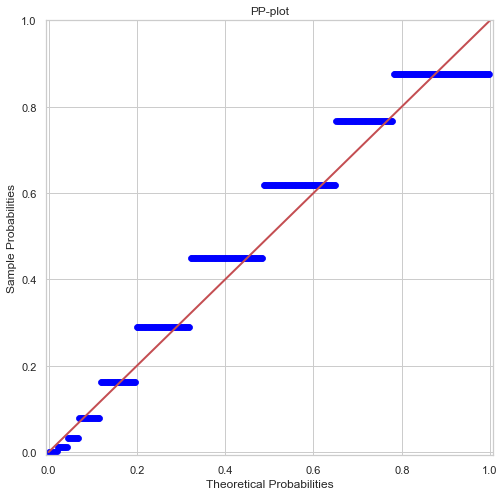

In [238]:
pp_plot(dataset.continuance_purchase_intention, dist = scipy.stats.norm(dataset.continuance_purchase_intention.mean(), dataset.continuance_purchase_intention.std()))

In [ ]:
z_score,p_value = skewtest(dataset.continuance_purchase_intention)
print("Z score of continuance purchase intention is {}".format(z_score))
print("p value of continuance purchase intention is {}".format(p_value))

In [ ]:
fig,ax = plt.subplots(figsize = (8,8))
qqplot(dataset.continuance_purchase_intention, line='s', ax = ax)
ax.set_title('QQ-plot')
plt.show()

In [ ]:
k2, p = stats.normaltest(dataset.continuance_purchase_intention)
alpha = 1e-3
print("p = {:g}".format(p))
p = 3.27207e-11
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")
print("If the null hypothesis is rejected, series comes from a normal distribution")

### 2. Correlation

In [ ]:
df_corr = dataset.corr(method = 'pearson')
# df_corr.to_excel('correlation.xlsx')

In [ ]:
# calculate Pearson's correlation
corr, p = pearsonr(dataset.enjoyment, dataset.continuance_purchase_intention)
print('Pearsons correlation: %.3f' % corr)
print('Pearsons correlation p value: %.30f' % p)

# calculate Pearson's correlation
corr, p = pearsonr(dataset.entertaiment, dataset.continuance_purchase_intention)
print('Pearsons correlation: %.3f' % corr)
print('Pearsons correlation p value: %.30f' % p)

# calculate Pearson's correlation
corr, p = pearsonr(dataset.education, dataset.continuance_purchase_intention)
print('Pearsons correlation: %.3f' % corr)
print('Pearsons correlation p value: %.30f' % p)

# calculate Pearson's correlation
corr, p = pearsonr(dataset.flow, dataset.continuance_purchase_intention)
print('Pearsons correlation: %.3f' % corr)
print('Pearsons correlation p value: %.30f' % p)

# calculate Pearson's correlation
corr, p = pearsonr(dataset.design_background, dataset.continuance_purchase_intention)
print('Pearsons correlation: %.3f' % corr)
print('Pearsons correlation p value: %.30f' % p)

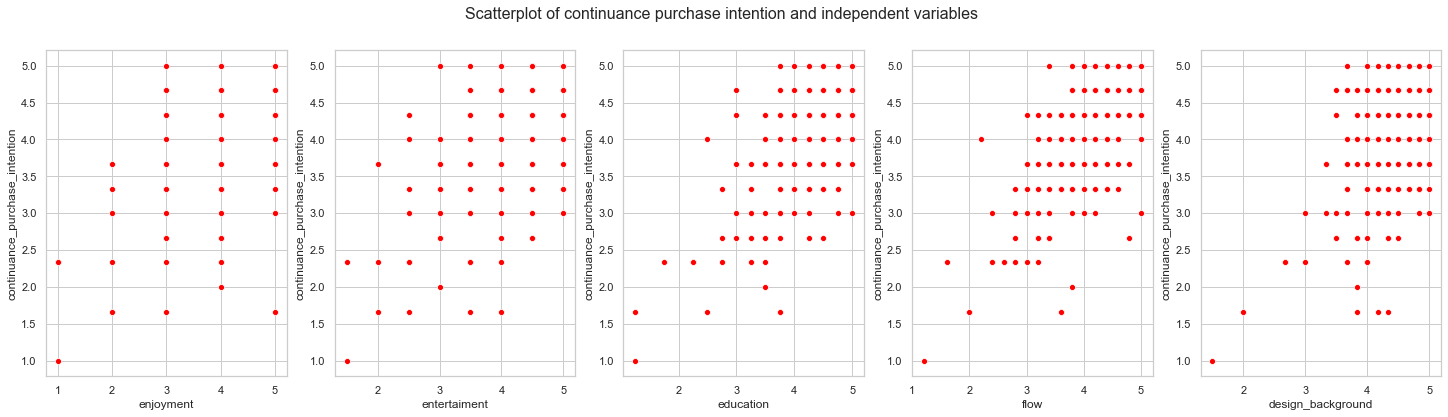

In [266]:
fig,axs = plt.subplots(1,5,figsize = (25,6))
fig.suptitle('Scatterplot of continuance purchase intention and independent variables', fontsize=16)
sns.scatterplot(data = dataset, x = "enjoyment", y = "continuance_purchase_intention", ax = axs[0], color = 'red')
sns.scatterplot(data = dataset, x = "entertaiment", y = "continuance_purchase_intention", ax = axs[1],color = 'red')
sns.scatterplot(data = dataset, x = "education", y = "continuance_purchase_intention", ax = axs[2],color = 'red')
sns.scatterplot(data = dataset, x = "flow", y = "continuance_purchase_intention", ax = axs[3],color = 'red')
sns.scatterplot(data = dataset, x = "design_background", y = "continuance_purchase_intention", ax = axs[4],color = 'red')
# axs[-1, -1].axis('off')


### 3. ANOVA

Before analyzing ANOVA, we must fit a multi linear regression 

In [267]:
dataset_ols = sm.add_constant(dataset)
model = ols("continuance_purchase_intention ~ enjoyment+entertaiment+education+flow+design_background", dataset_ols).fit()
print(model.summary())
print("")
result = sm.stats.anova_lm(model, typ = 1)

                                  OLS Regression Results                                  
Dep. Variable:     continuance_purchase_intention   R-squared:                       0.594
Model:                                        OLS   Adj. R-squared:                  0.587
Method:                             Least Squares   F-statistic:                     88.55
Date:                            Fri, 29 Jan 2021   Prob (F-statistic):           3.62e-57
Time:                                    15:38:19   Log-Likelihood:                -221.86
No. Observations:                             309   AIC:                             455.7
Df Residuals:                                 303   BIC:                             478.1
Df Model:                                       5                                         
Covariance Type:                        nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----

In [268]:
print("ANOVA Results")
print(result)
result.to_excel('ANOVA Result.xlsx')

ANOVA Results
                      df     sum_sq    mean_sq           F        PR(>F)
enjoyment            1.0  62.273126  62.273126  248.098954  2.983435e-41
entertaiment         1.0  17.382063  17.382063   69.250927  2.999019e-15
education            1.0  22.990386  22.990386   91.594737  3.935944e-19
flow                 1.0   7.316356   7.316356   29.148692  1.355737e-07
design_background    1.0   1.163430   1.163430    4.635158  3.211239e-02
Residual           303.0  76.053352   0.251001         NaN           NaN


In [ ]:
"""
The function below was created specifically for the one-way ANOVA table results returned for Type II sum of squares
"""

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

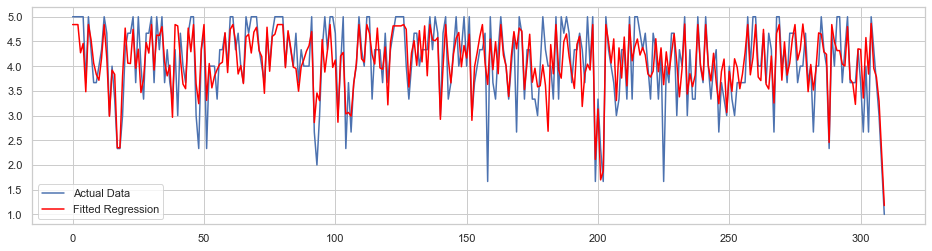

In [280]:
fitted_regression = model.predict(dataset.drop(columns='continuance_purchase_intention'))
plt.figure(figsize = (16,4))
plt.plot(dataset.continuance_purchase_intention, label = 'Actual Data')
plt.plot(fitted_regression,label = 'Fitted Regression', color = 'red')
plt.legend()

In [275]:
import scipy.stats as stats

stats.f_oneway(pred, dataset.continuance_purchase_intention)

F_onewayResult(statistic=2.842162641729475e-28, pvalue=1.0)

### 4. Goodness of Fit

In [281]:
print("Goodness of fit measured by R-squared is : {}".format(model.rsquared))

Goodness of fit measured by R-squared is : 0.5936858877441155


### 5. Multicolinearity

In [282]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

X = dataset.iloc[:,1:]
calc_vif(X)

,variables,VIF
0,enjoyment,73.111121
1,entertaiment,94.165476
2,education,139.770873
3,flow,120.016626
4,design_background,83.503876


In [ ]:
calc_vif(X).to_excel('VIF.xlsx')

In [ ]:
pd.DataFrame(model.pvalues).to_excel('multi regression param p value.xlsx')